## Testing 2D Propagation

In [20]:
import sys
import os

# Get absolute path to the real src folder (repo root + src)
repo_root = os.path.abspath(os.path.join(os.getcwd(), ".."))
sys.path.insert(0, os.path.join(repo_root, "src"))

import fourieroptics as fo


## Setup

In [21]:
import numpy as np
import matplotlib.pyplot as plt
import fourieroptics as fo

# -------------------------
# Parameters
# -------------------------
N = int(2e5)            # grid points
dx = 1e-8               # grid spacing (10 nm here, careful: comment said 10 µm!)
wavelength = 633e-9     # 633 nm
z_max = 0.2             # 20 cm propagation
pinhole_width = 200e-6  # 200 µm pinhole

# -------------------------
# 1D coordinate grid and pinhole
# -------------------------
x = fo.coords_1D(N, dx)
E0 = fo.pinhole_1D(x, pinhole_width)

## Fresnel Transfer Function

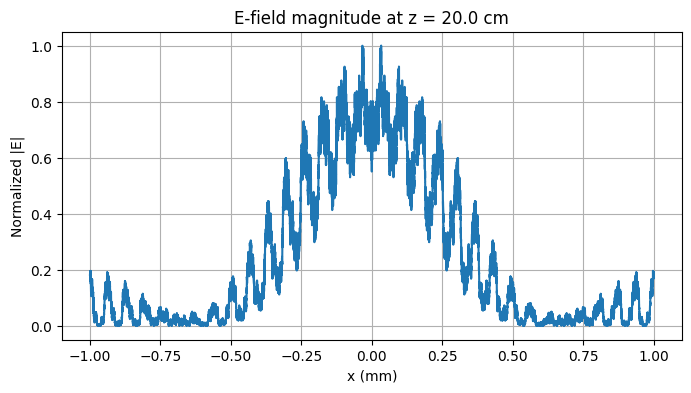

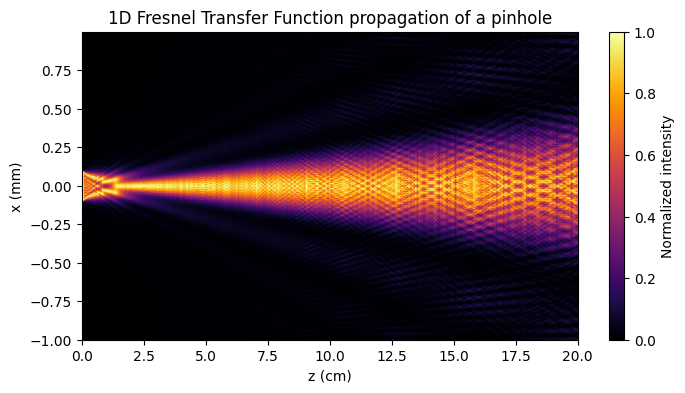

In [22]:
# -------------------------
# Compute z-step intensity map using 1D Fresnel Transfer Function
# -------------------------
I_map, z_vals = fo.z_step_1D(E0, x, fo.fresnel_tf_1D, wavelength, z_range=z_max, n_points=300)

# -------------------------
# Plot E-field magnitude at final z
# -------------------------
plt.figure(figsize=(8,4))
plt.plot(x*1e3, np.abs(I_map[:,-1]) / np.max(np.abs(I_map[:,-1])), label='|E| (magnitude)')
plt.xlabel("x (mm)")
plt.ylabel("Normalized |E|")
plt.title(f"E-field magnitude at z = {z_vals[-1]*100:.1f} cm")
plt.grid(True)
plt.show()

# -------------------------
# Plot intensity map
# -------------------------
plt.figure(figsize=(8,4))
plt.imshow(I_map, extent=[z_vals[0]*1e2, z_vals[-1]*1e2, x[0]*1e3, x[-1]*1e3],
           aspect='auto', cmap='inferno', origin='lower')
plt.xlabel("z (cm)")
plt.ylabel("x (mm)")
plt.title("1D Fresnel Transfer Function propagation of a pinhole")
plt.colorbar(label="Normalized intensity")
plt.show()


## Angular Spectrum Method

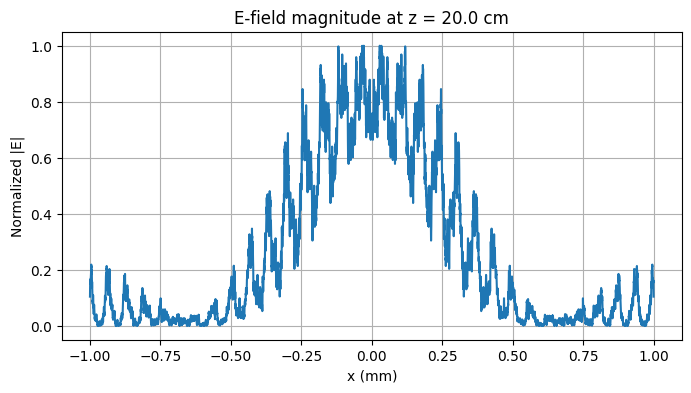

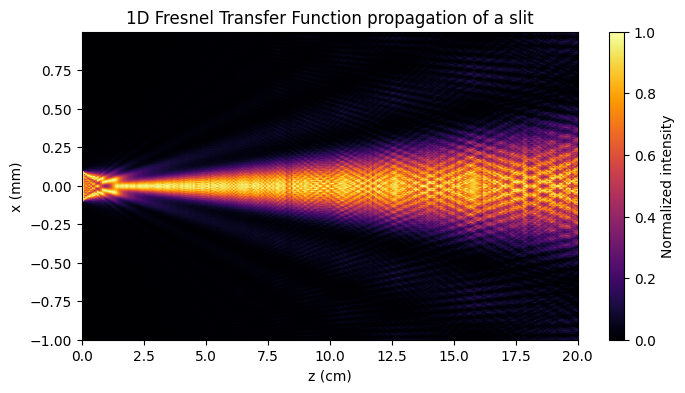

In [23]:
# -------------------------
# Compute z-step intensity map using 1D Fresnel Transfer Function
# -------------------------
I_map, z_vals = fo.z_step_1D(E0, x, fo.angular_spectrum_1D, wavelength, z_range=z_max, n_points=300)

# -------------------------
# Plot E-field magnitude at final z
# -------------------------
plt.figure(figsize=(8,4))
plt.plot(x*1e3, np.abs(I_map[:,-1]) / np.max(np.abs(I_map[:,-1])), label='|E| (magnitude)')
plt.xlabel("x (mm)")
plt.ylabel("Normalized |E|")
plt.title(f"E-field magnitude at z = {z_vals[-1]*100:.1f} cm")
plt.grid(True)
plt.show()

# -------------------------
# Plot intensity map
# -------------------------
plt.figure(figsize=(8,4))
plt.imshow(I_map, extent=[z_vals[0]*1e2, z_vals[-1]*1e2, x[0]*1e3, x[-1]*1e3],
           aspect='auto', cmap='inferno', origin='lower')
plt.xlabel("z (cm)")
plt.ylabel("x (mm)")
plt.title("1D Fresnel Transfer Function propagation of a slit")
plt.colorbar(label="Normalized intensity")
plt.show()

## Test Gaussian Beam Generation

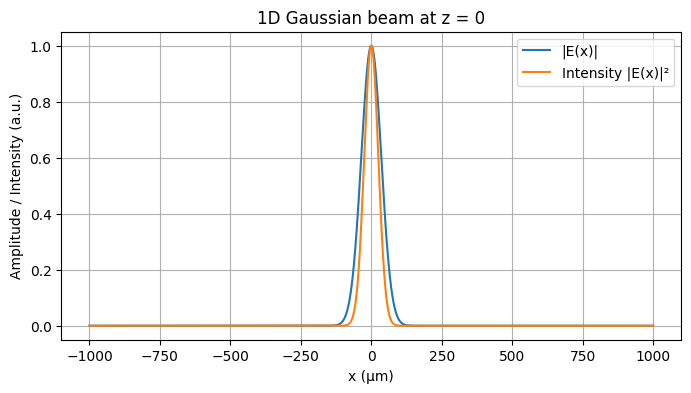

In [24]:
w0 = 50e-6        # beam waist = 50 µm
E0 = fo.gaussian_beam_1D(x, w0)

# -------------------------
# Plot field magnitude and intensity
# -------------------------
plt.figure(figsize=(8,4))
plt.plot(x*1e6, np.abs(E0), label='|E(x)|')
plt.plot(x*1e6, np.abs(E0)**2, label='Intensity |E(x)|²')
plt.xlabel("x (µm)")
plt.ylabel("Amplitude / Intensity (a.u.)")
plt.title("1D Gaussian beam at z = 0")
plt.legend()
plt.grid(True)
plt.show()

## Test Double Slit

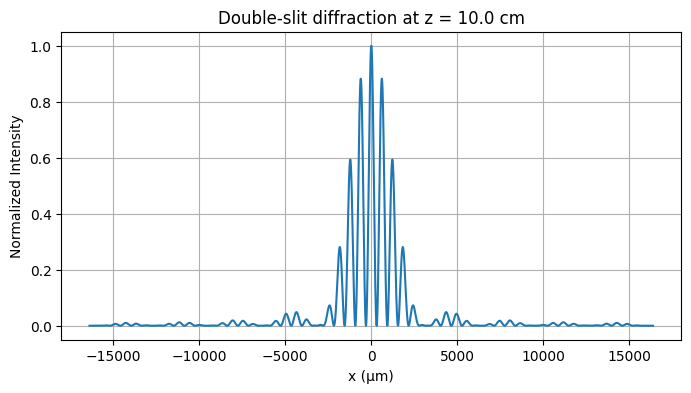

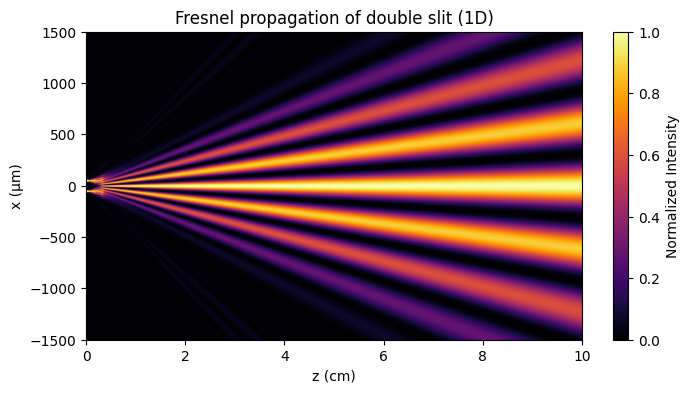

In [28]:
# ------------------------# Parameters
# -------------------------
N = 2**14             # grid points (power of 2 for FFT efficiency)
dx = 2e-6             # grid spacing = 2 µm
wavelength = 633e-9   # 633 nm
z_max = 0.1           # propagation up to 10 cm
slit_width = 20e-6    # slit width = 20 µm
slit_sep = 100e-6     # slit separation = 100 µm

# -------------------------
# Build coordinate grid and double slit field
# -------------------------
x = fo.coords_1D(N, dx)
E0 = fo.double_slit_1D(x, slit_width, slit_sep)

# -------------------------
# Propagate with Fresnel Transfer Function
# -------------------------
I_map, z_vals = fo.z_step_1D(E0, x, fo.fresnel_tf_1D,
                             wavelength, z_range=z_max, n_points=200)

# -------------------------
# Plot intensity at final z
# -------------------------
plt.figure(figsize=(8,4))
plt.plot(x*1e6, I_map[:,-1] / np.max(I_map[:,-1]))
plt.xlabel("x (µm)")
plt.ylabel("Normalized Intensity")
plt.title(f"Double-slit diffraction at z = {z_vals[-1]*100:.1f} cm")
plt.grid(True)
plt.show()

# -------------------------
# Plot z-evolution intensity map
# -------------------------
plt.figure(figsize=(8,4))
plt.imshow(I_map, extent=[z_vals[0]*1e2, z_vals[-1]*1e2, x[0]*1e6, x[-1]*1e6],
           aspect='auto', cmap='inferno', origin='lower')
plt.xlabel("z (cm)")
plt.ylabel("x (µm)")
plt.ylim(-1500, 1500)
plt.title("Fresnel propagation of double slit (1D)")
plt.colorbar(label="Normalized Intensity")
plt.show()
